In [45]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set_theme(color_codes=True)
%matplotlib inline

In [2]:
df_train =  pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
len(df_train)

891

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train = df_train.dropna( subset=['Embarked'] )

In [7]:
df_train['Age'].interpolate(method='linear' ,  limit_direction='forward' , inplace=True)

In [8]:
y = df_train.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked' , 'Cabin'])
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [19]:
X = df_train.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
X.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

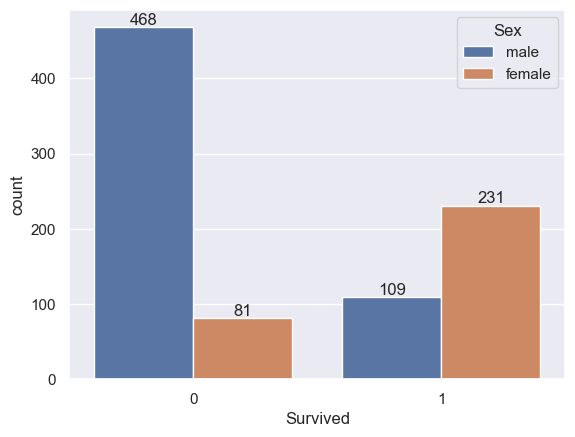

In [54]:
ax = sns.countplot(data=X  , x='Survived' , hue='Sex')

for container in ax.containers:
    ax.bar_label(container)

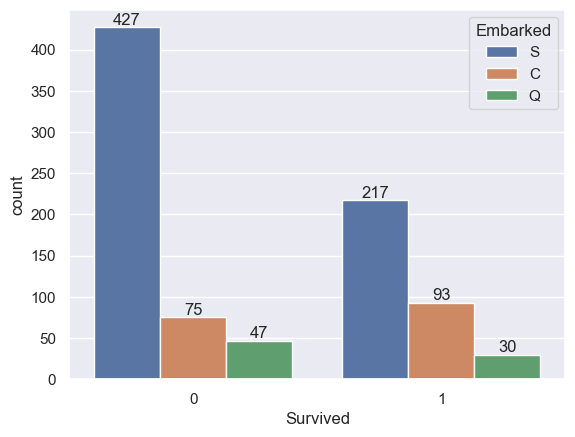

In [56]:
ax = sns.countplot(data=X  , x='Survived' , hue='Embarked')

for container in ax.containers:
    ax.bar_label(container)

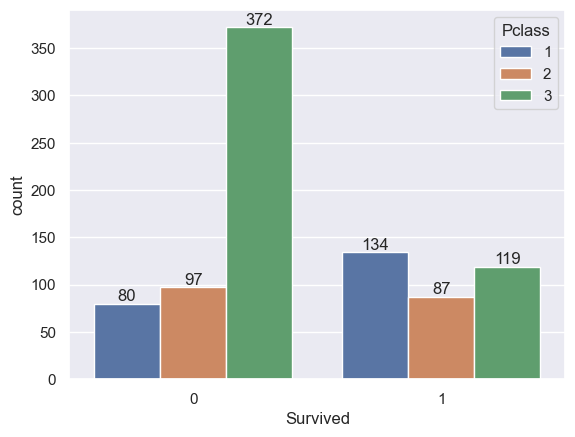

In [57]:
ax = sns.countplot(data=X  , x='Survived' , hue='Pclass')

for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='Age', ylabel='Count'>

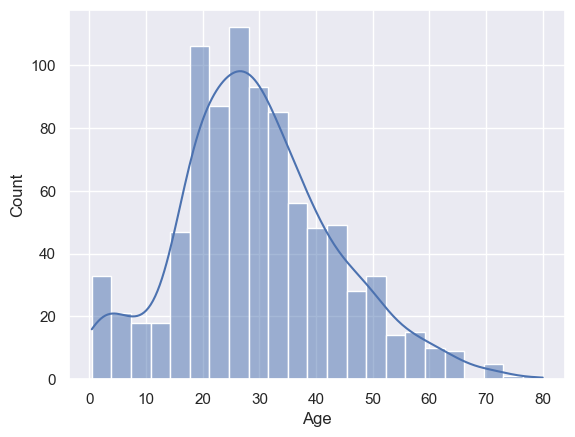

In [58]:
sns.histplot(data=X["Age"], kde=True)


<AxesSubplot:xlabel='Fare', ylabel='Count'>

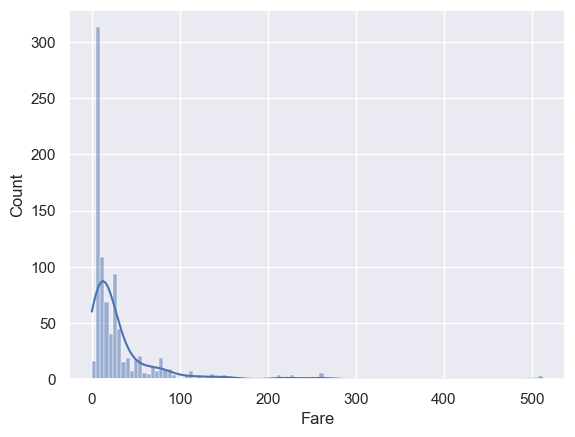

In [59]:
sns.histplot(data=X["Fare"], kde=True)

In [62]:
X.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [63]:
X['Sex_label'] = np.where(X["Sex"] == "female" , 0,1)
X.drop(columns=['Sex'] , inplace=True)

In [64]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [90]:

encording = pd.get_dummies(X['Embarked'], prefix='Embarked')
X_final = X.join(encording)
X_final.drop(columns=['Embarked', 'Survived'] , inplace=True)

X_final.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_label,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [153]:
from sklearn.datasets import make_classification

X_final, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)

In [91]:
from sklearn.model_selection import train_test_split
import xgboost as xgb


X_train , X_test , y_train , y_test = train_test_split(X_final , y , test_size=0.2 , random_state=42)


X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_label,Embarked_C,Embarked_Q,Embarked_S
708,1,22.000000,0,0,151.5500,0,0,0,1
240,3,31.666667,1,0,14.4542,0,1,0,0
382,3,32.000000,0,0,7.9250,1,0,0,1
792,3,19.000000,8,2,69.5500,0,0,0,1
683,3,14.000000,5,2,46.9000,1,0,0,1


In [161]:
data_dmatrix = xgb.DMatrix(data=X_final,label=y)

In [162]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1,
            'n_estimators':100
        }

In [163]:
model = xgb.XGBClassifier(**params)


[0]	validation_0-logloss:0.45960	validation_1-logloss:0.45325
[1]	validation_0-logloss:0.42931	validation_1-logloss:0.43358
[2]	validation_0-logloss:0.41346	validation_1-logloss:0.43779
[3]	validation_0-logloss:0.40034	validation_1-logloss:0.44137
[4]	validation_0-logloss:0.39400	validation_1-logloss:0.44810
[5]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[6]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[7]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[8]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[9]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[10]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[11]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[12]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[13]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[14]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[15]	validation_0-logloss:0.39201	validation_1-logloss:0.44395
[1

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

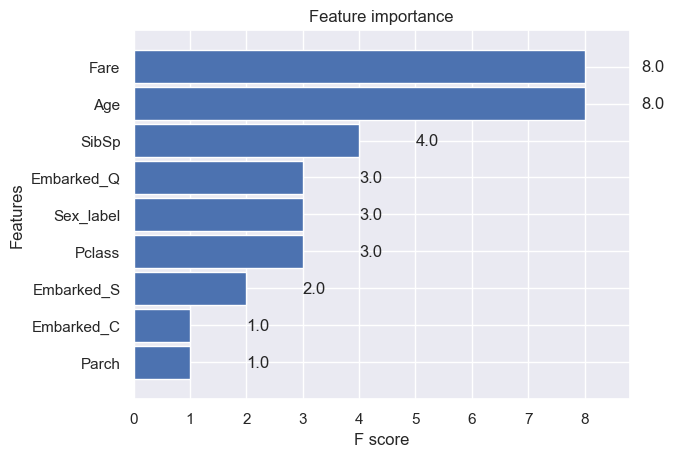

In [164]:
model.fit(X_train ,y_train , eval_set = [(X_train , y_train) , (X_test , y_test)])
xgb.plot_importance(model, height=0.9)


In [165]:
y_pre = model.predict(X_test)


In [166]:
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(y_true=y_test , y_pred=y_pre)

0.8033707865168539

In [167]:
matrix = confusion_matrix(y_true=y_test , y_pred=y_pre)

Text(47.25, 0.5, 'true value')

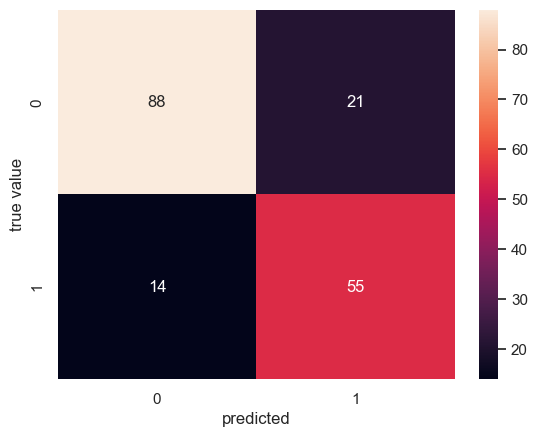

In [168]:
sns.heatmap(matrix , annot=True , fmt= 'd')
plt.xlabel('predicted')
plt.ylabel('true value')


In [169]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train , y_train)
other_predictions = clf.predict(X_test)
accuracy_score(y_true=y_test , y_pred=other_predictions)

C:\Users\egovridc\AppData\Local\Temp\ipykernel_7836\302543705.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.797752808988764

In [170]:
df_test = pd.read_csv('test.csv')

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
submit = df_test.drop(columns=[ 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked' , 'Cabin'])

In [172]:
df_test.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [173]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [174]:
df_test['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [175]:
df_test.dropna(subset=['Fare'] , inplace=True)
df_test['Age'].interpolate(method='linear' ,  limit_direction='forward' , inplace=True)
df_test['Sex_label'] = np.where(df_test["Sex"] == "female" , 0,1)
df_test.drop(columns=['Sex'] , inplace=True)


encording = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
X_valid = df_test.join(encording)
X_valid.drop(columns=['Embarked'] , inplace=True)

X_valid.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_label,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


In [176]:
predicted =model.predict(X_valid)

In [177]:
df_pre = pd.DataFrame(
    {
    'survived':predicted
    }
)

In [178]:
df_pre.isnull().sum()

survived    0
dtype: int64

In [179]:
results = submit.join(df_pre)
results.head()

,PassengerId,survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,0.0


In [180]:
results.to_csv('submitions.csv')